Enter password: ········


<Item title:"Will update later" type:Web Map owner:DavidJVitale>
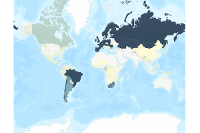

In [7]:
from arcgis.gis import GIS
gis = GIS(username="DavidJVitale")
webmap_item = gis.content.get('a1c02dbc5dd7414687eb0a2147af726f')
webmap_item

<Item title:"Children affected by social protection" type:Web Map owner:DavidJVitale>
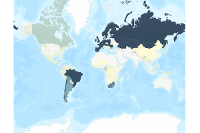

In [9]:
webmap_item.update({'title' : 'Children affected by social protection',
                    'snippet' : 'Visualize the relationship between '\
                                'child labor rates and child poverty.'})
webmap_item

In [99]:
from arcgis.mapping import WebMap
webmap = WebMap(webmap_item)
webmap

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

In [86]:
wm_data = webmap_item.get_data()
wm_data

{'operationalLayers': [{'id': 'SI_COV_CHLD_131_2017Q2G01_2473',
   'layerType': 'ArcGISFeatureLayer',
   'url': 'https://services7.arcgis.com/gp50Ao2knMlOM89z/arcgis/rest/services/SI_COV_CHLD_131_2017Q2G01/FeatureServer/0',
   'visibility': False,
   'opacity': 1,
   'title': 'SI_COV_CHLD_131_2017Q2G01 - Indicator 1.3.1: Proportion of children covered by social protection, total (%)',
   'popupInfo': {'title': 'Indicator 1.3.1: Proportion of children covered by social protection, total (%): {geoAreaName}',
    'fieldInfos': [{'fieldName': 'series_release',
      'label': 'Series Release',
      'isEditable': True,
      'tooltip': '',
      'visible': True,
      'stringFieldOption': 'textbox'},
     {'fieldName': 'series_code',
      'label': 'Series Code',
      'isEditable': True,
      'tooltip': '',
      'visible': True,
      'stringFieldOption': 'textbox'},
     {'fieldName': 'series_description',
      'label': 'Series Description',
      'isEditable': True,
      'tooltip': '

In [70]:
for layer in wm_data['operationalLayers']:
    print(layer['id'])

SI_COV_CHLD_131_2017Q2G01_2473
World_Countries__Generalized__2442
Children_affected_by_social_protection_7108
Children_2_9096
Children_3_859


In [71]:
for layer in wm_data['operationalLayers']:
    print("{} - {}".format(layer['id'], layer['url']))
    print("-----")

SI_COV_CHLD_131_2017Q2G01_2473 - https://services7.arcgis.com/gp50Ao2knMlOM89z/arcgis/rest/services/SI_COV_CHLD_131_2017Q2G01/FeatureServer/0
-----
World_Countries__Generalized__2442 - https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries_(Generalized)/FeatureServer/0
-----
Children_affected_by_social_protection_7108 - https://my-onpremise-portal-that-no-longer-exists.com/arcgis/rest/services/Children_affected_by_social_protection/FeatureServer/0
-----
Children_2_9096 - https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Children_2/FeatureServer/0
-----
Children_3_859 - https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Children_3/FeatureServer/0
-----


In [72]:
import urllib.request
def get_response_code_for(url):
    try:
        conn = urllib.request.urlopen(url)
    except urllib.error.HTTPError as e:
        # Return code error (e.g. 404, 501, ...)
        return e.code
    except urllib.error.URLError as e:
        # Not an HTTP-specific error (e.g. connection refused)
        # ...
        return -1
    else:
        # 200 or other 'good' code
        return conn.code

In [73]:
get_response_code_for("https://arcgis.com")

200

In [74]:
get_response_code_for("https://arcgis.com/thisurlpagedoesntexist/ok")

404

In [75]:
get_response_code_for("https://thisdomaindoesntexist.com")

-1

In [76]:
import urllib
def test_layer_urls_for(wm_data):
    for layer in wm_data['operationalLayers']:
        layer_url = layer['url']
        response_code = get_response_code_for(layer_url)
        if response_code >= 200 and response_code < 300:
            print("✅ Layer '{}' is OK".format(layer['id']))
        else:
            print("❌ Layer '{}' is unreachable".format(layer['id']))
test_layer_urls_for(wm_data)

✅ Layer 'SI_COV_CHLD_131_2017Q2G01_2473' is OK
✅ Layer 'World_Countries__Generalized__2442' is OK
❌ Layer 'Children_affected_by_social_protection_7108' is unreachable
✅ Layer 'Children_2_9096' is OK
✅ Layer 'Children_3_859' is OK


In [77]:
wm_data['operationalLayers'][2]

{'id': 'Children_affected_by_social_protection_7108',
 'layerType': 'ArcGISFeatureLayer',
 'url': 'https://my-onpremise-portal-that-no-longer-exists.com/arcgis/rest/services/Children_affected_by_social_protection/FeatureServer/0',
 'visibility': False,
 'opacity': 1,
 'title': 'Children_affected_by_social_protection',
 'itemId': 'c8442dc928a748b2b6d7ade04655934e',
 'popupInfo': {'title': 'Children_affected_by_social_protection',
  'fieldInfos': [{'fieldName': 'OBJECTID',
    'label': 'OBJECTID',
    'isEditable': False,
    'tooltip': '',
    'visible': False,
    'stringFieldOption': 'textbox'},
   {'fieldName': 'Join_Count',
    'label': 'Join_Count',
    'isEditable': True,
    'tooltip': '',
    'visible': True,
    'stringFieldOption': 'textbox',
    'format': {'places': 0, 'digitSeparator': True}},
   {'fieldName': 'series_release',
    'label': 'Series Release',
    'isEditable': True,
    'tooltip': '',
    'visible': True,
    'stringFieldOption': 'textbox'},
   {'fieldName': 

In [78]:
wm_data['operationalLayers'][2]['url']

'https://my-onpremise-portal-that-no-longer-exists.com/arcgis/rest/services/Children_affected_by_social_protection/FeatureServer/0'

In [83]:
wm_data['operationalLayers'][2]['url'] = 'https://arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Children_affected_by_social_protection/FeatureServer/0'
wm_data['operationalLayers'][2]

{'id': 'Children_affected_by_social_protection_7108',
 'layerType': 'ArcGISFeatureLayer',
 'url': 'https://arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Children_affected_by_social_protection/FeatureServer/0',
 'visibility': False,
 'opacity': 1,
 'title': 'Children_affected_by_social_protection',
 'itemId': 'c8442dc928a748b2b6d7ade04655934e',
 'popupInfo': {'title': 'Children_affected_by_social_protection',
  'fieldInfos': [{'fieldName': 'OBJECTID',
    'label': 'OBJECTID',
    'isEditable': False,
    'tooltip': '',
    'visible': False,
    'stringFieldOption': 'textbox'},
   {'fieldName': 'Join_Count',
    'label': 'Join_Count',
    'isEditable': True,
    'tooltip': '',
    'visible': True,
    'stringFieldOption': 'textbox',
    'format': {'places': 0, 'digitSeparator': True}},
   {'fieldName': 'series_release',
    'label': 'Series Release',
    'isEditable': True,
    'tooltip': '',
    'visible': True,
    'stringFieldOption': 'textbox'},
   {'fieldName': 'series_code',
   

In [87]:
test_layer_urls_for(wm_data)

✅ Layer 'SI_COV_CHLD_131_2017Q2G01_2473' is OK
✅ Layer 'World_Countries__Generalized__2442' is OK
✅ Layer 'Children_affected_by_social_protection_7108' is OK
✅ Layer 'Children_2_9096' is OK
✅ Layer 'Children_3_859' is OK


<Item title:"Children affected by social protection" type:Web Map owner:DavidJVitale>
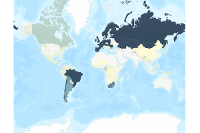

In [102]:
webmap_item.update({'text' : wm_data})
webmap_item

In [96]:
new_webmap_dict = dict(webmap_item)
new_webmap_dict['text'] = wm_data
new_webmap_item = gis.content.add(new_webmap_dict)
new_webmap_item

<Item title:"Children affected by social protection" type:Web Map owner:DavidJVitale>

In [100]:
new_webmap = WebMap(new_webmap_item)
new_webmap

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…